In [1]:
from deepBreaks.preprocessing import read_data
import pandas as pd


In [2]:
wrk_dir = "./vpod_1.2_data_splits_2025-02-28_15-51-04"
aapTestFileName = "./wds_aa_prop_xgb_cross_validation_err_report.csv"
ohTestFileName = f"./wds_one_hot_gbr_cross_validation_err_report.csv"

aap_test = read_data(aapTestFileName, seq_type = None, is_main=False)
oh_test = read_data(ohTestFileName, seq_type = None, is_main=False)

In [17]:
oh_test.head()

,prediction_errors,Abs_Err,Sqr_Err
0,4.912663,4.912663,24.134259
1,1.101039,1.101039,1.212287
2,1.575420,1.575420,2.481949
3,-0.316946,0.316946,0.100455
4,3.613792,3.613792,13.059494


In [4]:
aap_test['Abs_Err'] = abs(aap_test['prediction_errors'])
oh_test['Abs_Err'] = abs(oh_test['prediction_errors'])

aap_test['Sqr_Err'] = aap_test['Abs_Err']**2
oh_test['Sqr_Err'] = oh_test['Abs_Err']**2

In [5]:
oh_test.head()

,prediction_errors,Abs_Err,Sqr_Err
0,4.912663,4.912663,24.134259
1,1.101039,1.101039,1.212287
2,1.575420,1.575420,2.481949
3,-0.316946,0.316946,0.100455
4,3.613792,3.613792,13.059494


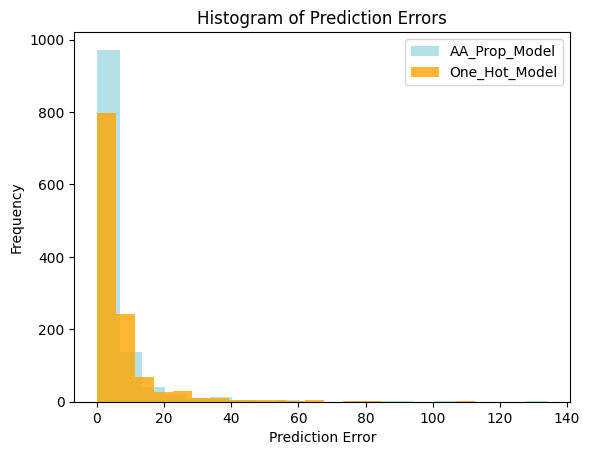

Shapiro-Wilk Test for AA-Prop Errors: statistic = 0.4654964653530693 p-value = 6.645588194833263e-51
Shapiro-Wilk Test for One-Hot Errors: statistic = 0.5636338431676009 p-value = 1.1773297781522571e-47
Anderson Test for AA-Prop Errors: statistic = 182.70951143542447
Anderson Test for One-Hot Errors: statistic = 144.84346402521055
Critical Values are: [0.574 0.654 0.784 0.915 1.088]


In [6]:

import matplotlib.pyplot as plt
import scipy.stats as st

# Histogram
plt.hist(aap_test['Abs_Err'], bins=20, alpha=0.4, label='AA_Prop_Model', color='#41b6c4')
#plt.hist(abs(vert_test['Abs_Err']), bins=20, alpha=0.6, label='Vert_Model')
plt.hist(oh_test['Abs_Err'], bins=20, alpha=0.8, label='One_Hot_Model', color='orange')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Prediction Errors')
plt.show()

# Shapiro-Wilk Test for Normal Distribution
statistic, p_value = st.shapiro(abs(aap_test['Abs_Err']))
print("Shapiro-Wilk Test for AA-Prop Errors: statistic =", statistic, "p-value =", p_value)
#statistic, p_value = st.shapiro(abs(vert_test['Abs_Err']))
#print("Shapiro-Wilk Test for Vert-Model Errors: statistic =", statistic, "p-value =", p_value)
statistic, p_value = st.shapiro(abs(oh_test['Abs_Err']))
print("Shapiro-Wilk Test for One-Hot Errors: statistic =", statistic, "p-value =", p_value)

# Anderson Test for Normal Distribution
res = st.anderson(abs(aap_test['Abs_Err']))
print("Anderson Test for AA-Prop Errors: statistic =", res.statistic)
res = st.anderson(abs(oh_test['Abs_Err']))
print("Anderson Test for One-Hot Errors: statistic =", res.statistic)

print(f"Critical Values are: {res.critical_values}")

In [7]:
import scipy.stats as st
import statistics

# Perform Wilcoxn Signed-Rank Test on ALL Mutant Data
print("Wilcoxn Signed-Rank Test on ALL CV Prediction Errors")

statistic, p_value = st.wilcoxon(aap_test['Abs_Err'], oh_test['Abs_Err'], alternative='less')
print("Wilcoxon Test: Statistic =", statistic, "p-value =", p_value, "\n")

print(f"Mean of AA-Prop Abs-Error = {statistics.mean(aap_test['Abs_Err']):.1f}nm\nMean of AA-Prop Square-Error (MSE) = {statistics.mean(aap_test['Sqr_Err']):.1f} // Root Mean Square Error (RMSE) = {statistics.sqrt(statistics.mean(aap_test['Sqr_Err'])):.1f}nm\n")
print(f"Mean of One-Hot Abs-Error = {statistics.mean(oh_test['Abs_Err']):.1f}nm\nMean of One-Hot Square-Error (MSE) = {statistics.mean(oh_test['Sqr_Err']):.1f} // Root Mean Square Error (RMSE) = {statistics.sqrt(statistics.mean(oh_test['Sqr_Err'])):.1f}nm")

Wilcoxn Signed-Rank Test on ALL CV Prediction Errors
Wilcoxon Test: Statistic = 275203.0 p-value = 2.430765432629807e-14 

Mean of AA-Prop Abs-Error = 5.4nm
Mean of AA-Prop Square-Error (MSE) = 133.6 // Root Mean Square Error (RMSE) = 11.6nm

Mean of One-Hot Abs-Error = 6.5nm
Mean of One-Hot Square-Error (MSE) = 146.4 // Root Mean Square Error (RMSE) = 12.1nm


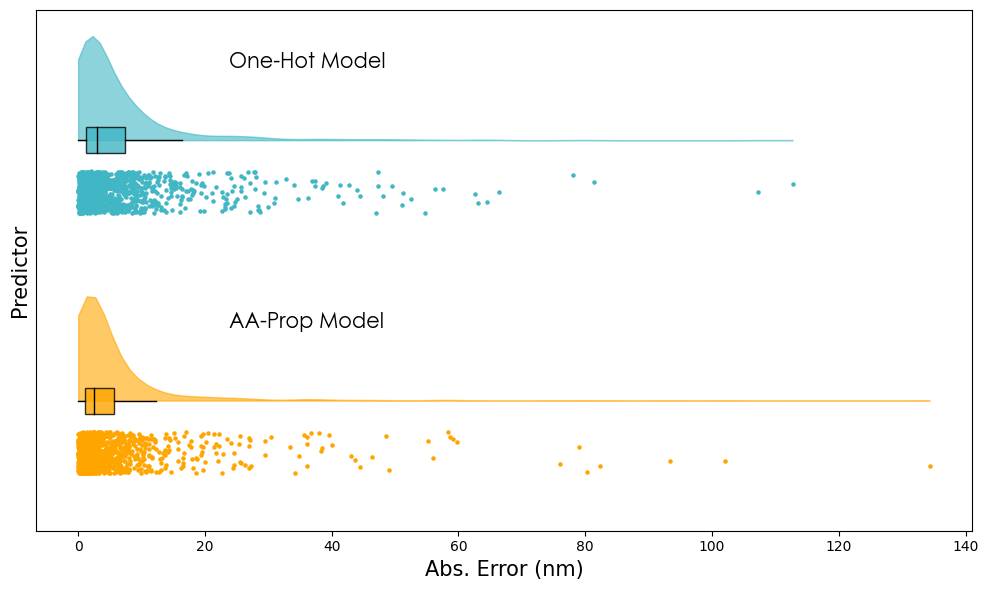

<Figure size 640x480 with 0 Axes>

In [8]:
import ptitprince as pt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


fig, ax = plt.subplots(figsize=(10, 6))
plt.rcParams['font.family'] = 'Century Gothic'

#palette = sns.color_palette("Set2")
palette = ['orange', '#41b6c4']
data=[abs(aap_test['Abs_Err']), abs(oh_test['Abs_Err'])]
model_names = ["AA-Prop Model", "One-Hot Model"]


# Boxplot data
bp = ax.boxplot(data, patch_artist = True, vert = False, showcaps= False, showfliers= False, widths=0.1)

# Change to the desired color and add transparency
for patch, color in zip(bp['boxes'], palette):
    patch.set_facecolor(color)
    patch.set_alpha(0.8)
for median in bp['medians']:
    median.set_color('black')


# Violinplot data
vp = ax.violinplot(dataset = data,
                     showmeans=False, showextrema=False, showmedians=False, vert = False, widths= 0.8)
for idx, b in enumerate(vp['bodies']):
    # Get the center of the plot
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # Modify it so we only see the upper half of the violin plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
    # Change to the desired color
    b.set_color(palette[idx])
    b.set_alpha(0.6)

# Scatterplot data
for idx, features in enumerate(data):
    # Add jitter effect so the features do not overlap on the y-axis
    y = np.full(len(features), idx + .8)
    idxs = np.arange(len(y))
    out = y.astype(float)
    out.flat[idxs] += np.random.uniform(low=-.08, high=.08, size=len(idxs))
    y = out
    plt.scatter(features, y, s=5, c=palette[idx])

# Annotate with model names to the right of the plot
top_max = 0
for idx, model_name in enumerate(model_names):
    max_val = max([d[idx] for d in data]) # Find the maximum value in each plot
    if max_val > top_max:
        top_max = max_val
for idx, model_name in enumerate(model_names):
    ax.text((max_val+1)*10, idx + 1.3, model_name, va='center', fontsize=15)

# Customize axis labels
plt.yticks([])
plt.ylabel('Predictor', fontsize = 15)
plt.xlabel('Abs. Error (nm)', fontsize = 15)

plt.tight_layout()
#save file
fileout = 'wds_test_err_rain_plt.png'
plt.savefig(fileout, format = 'png', dpi = 400)
fileout = 'wds_test_err_rain_plt.svg'
plt.savefig(fileout, format='svg', bbox_inches='tight')
plt.show()
plt.clf()
plt.show()

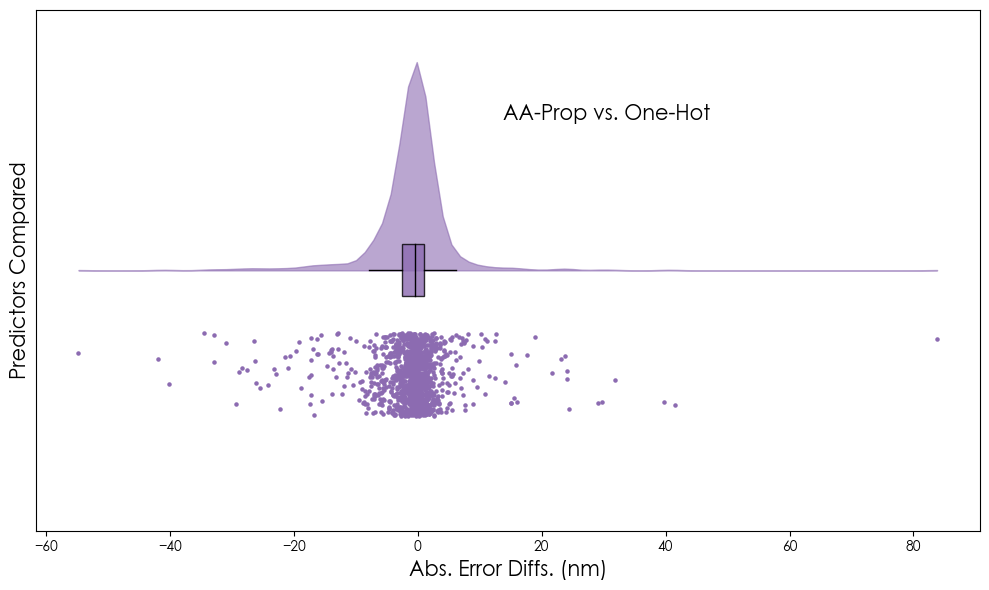

<Figure size 640x480 with 0 Axes>

In [16]:
import ptitprince as pt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


fig, ax = plt.subplots(figsize=(10, 6))

#palette = sns.color_palette("Set2")
palette = ['#8c6bb1']
data=[aap_test['Abs_Err']-oh_test['Abs_Err']]
model_names = ["AA-Prop vs. One-Hot"]


# Boxplot data
bp = ax.boxplot(data, patch_artist = True, vert = False, showcaps= False, showfliers= False, widths=0.1)

# Change to the desired color and add transparency
for patch, color in zip(bp['boxes'], palette):
    patch.set_facecolor(color)
    patch.set_alpha(0.8)
for median in bp['medians']:
    median.set_color('black')


# Violinplot data
vp = ax.violinplot(dataset = data,
                     showmeans=False, showextrema=False, showmedians=False, vert = False, widths= 0.8)
for idx, b in enumerate(vp['bodies']):
    # Get the center of the plot
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # Modify it so we only see the upper half of the violin plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
    # Change to the desired color
    b.set_color(palette[idx])
    b.set_alpha(0.6)

# Scatterplot data
for idx, features in enumerate(data):
    # Add jitter effect so the features do not overlap on the y-axis
    y = np.full(len(features), idx + .8)
    idxs = np.arange(len(y))
    out = y.astype(float)
    out.flat[idxs] += np.random.uniform(low=-.08, high=.08, size=len(idxs))
    y = out
    plt.scatter(features, y, s=5, c=palette[idx])

# Annotate with model names to the right of the plot
top_max = 0
for idx, model_name in enumerate(model_names):
    max_val = max([d[idx] for d in data]) # Find the maximum value in each plot
    if max_val > top_max:
        top_max = max_val
for idx, model_name in enumerate(model_names):
    ax.text((max_val+3.5)*10, idx + 1.3, model_name, va='center', fontsize = 15)

# Customize axis labels
plt.rcParams['font.family'] = 'Century Gothic'
#plt.yticks([1, 2, 3], ["WDS-epi-Predictions", "WT-Predictions", "Additive-Predictions"])
plt.yticks([])
plt.ylabel('Predictors Compared', fontsize = 15)
plt.xlabel('Abs. Error Diffs. (nm)', fontsize = 15)


plt.tight_layout()
#save file
fileout = 'mut_test_comp_err_rain_plt.png'
plt.savefig(fileout, format = 'png', dpi = 400)
fileout = 'mut_test_comp_err_rain_plt.svg'
plt.savefig(fileout, format='svg', bbox_inches='tight')
plt.show()
plt.clf()
plt.show()